In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

In [2]:
# Load the data
df = pd.read_csv("new_unicorn_data_updated.csv")

In [3]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0


In [4]:
# Fix negative values

df['Years to Unicorn'] = df['Years to Unicorn'].replace(-3, 1)

df['Years to Unicorn'] = df['Years to Unicorn'].replace(0, 1)


In [5]:
# Encode 'Industry'
industry_le = LabelEncoder()
df['Encoded_Industry'] = industry_le.fit_transform(df['Industry'])

# Encode 'Country'
country_le = LabelEncoder()
df['Encoded_Country'] = country_le.fit_transform(df['Country'])

# Print the mapping dictionaries for 'Industry' and 'Country'
industry_mapping_dict = dict(zip(df['Encoded_Industry'].unique(), industry_le.inverse_transform(df['Encoded_Industry'].unique())))
sorted_industry_mapping_dict = sorted(industry_mapping_dict.items(), key=lambda x: x[0])

country_mapping_dict = dict(zip(df['Encoded_Country'].unique(), country_le.inverse_transform(df['Encoded_Country'].unique())))
sorted_country_mapping_dict = sorted(country_mapping_dict.items(), key=lambda x: x[0])

print("Encoded_Industry Mapping:")
for key, value in sorted_industry_mapping_dict:
    print(f"{key} = {value}")

print("\nEncoded_Country Mapping:")
for key, value in sorted_country_mapping_dict:
    print(f"{key} = {value}")

Encoded_Industry Mapping:
0 = Artificial Intelligence
1 = Auto And Transportation
2 = Consumer And Retail
3 = Cybersecurity
4 = Data Management And Analytics
5 = E-commerce And Direct-to-consumer
6 = Edtech
7 = Fintech
8 = Hardware
9 = Health
10 = Internet Software And Services
11 = Mobile And Telecommunications
12 = Other
13 = Supply Chain, Logistics, And Delivery
14 = Travel

Encoded_Country Mapping:
0 = Argentina
1 = Australia
2 = Austria
3 = Bahamas
4 = Belgium
5 = Bermuda
6 = Brazil
7 = Canada
8 = Chile
9 = China
10 = Colombia
11 = Croatia
12 = Denmark
13 = Estonia
14 = Finland
15 = France
16 = Germany
17 = Hong Kong
18 = India
19 = Indonesia
20 = Ireland
21 = Israel
22 = Italy
23 = Japan
24 = Lithuania
25 = Luxembourg
26 = Malaysia
27 = Mexico
28 = Netherlands
29 = Nigeria
30 = Norway
31 = Philippines
32 = Senegal
33 = Singapore
34 = South Africa
35 = South Korea
36 = Spain
37 = Sweden
38 = Switzerland
39 = Thailand
40 = Turkey
41 = United Arab Emirates
42 = United Kingdom
43 = U

In [6]:
# CompanyAge
df["CompanyAge"] = 2023 - df["Year Founded"]

In [7]:
df["CompanyAge"]

0       21
1       15
2       13
3       18
4       11
        ..
1034    11
1035     8
1036     5
1037    18
1038     9
Name: CompanyAge, Length: 1039, dtype: int64

In [8]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation,Encoded_Industry,Encoded_Country,CompanyAge
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0,12,43,21
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0,5,9,15
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0,7,43,13
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7,7,37,18
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0,10,1,11


In [9]:
# Select features
features = ['Encoded_Industry', 'Encoded_Country', 'CompanyAge', 'Funding_Numeric ($B)']

In [10]:
X = df[features]
X

,Encoded_Industry,Encoded_Country,CompanyAge,Funding_Numeric ($B)
0,12,43,21,7.000
1,5,9,15,2.000
2,7,43,13,2.000
3,7,37,18,4.000
4,10,1,11,0.572
...,...,...,...,...
1034,5,9,11,0.379
1035,5,9,8,0.990
1036,2,9,5,0.080
1037,7,42,18,0.792


In [11]:
Y = df['Years to Unicorn']
Y

0       10
1       10
2        4
3        6
4        6
        ..
1034     5
1035     2
1036     3
1037    16
1038     6
Name: Years to Unicorn, Length: 1039, dtype: int64

In [12]:
# Check the dimensions of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1039, 4)
Shape of Y: (1039,)


In [13]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Create and train the linear regression model
start_time = time.time()  # Record the start time
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
end_time = time.time()  # Record the end time

In [15]:
# Make predictions
Y_pred = linear_reg.predict(X_test)

In [16]:
# Calculate the training time
training_time = end_time - start_time
print(f'Training Time: {training_time} seconds')

Training Time: 0.004090070724487305 seconds


In [17]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.130221282170316


In [18]:
# Root Mean Squared Error
rmse = mean_squared_error(Y_test, Y_pred)
print(f'Root Mean Squared Error: {np.sqrt(rmse)}')

Root Mean Squared Error: 1.7692431382289762


In [19]:
from sklearn.metrics import r2_score
r2_score_result = r2_score(Y_test, Y_pred)
r2_score_result

0.8277541430921294

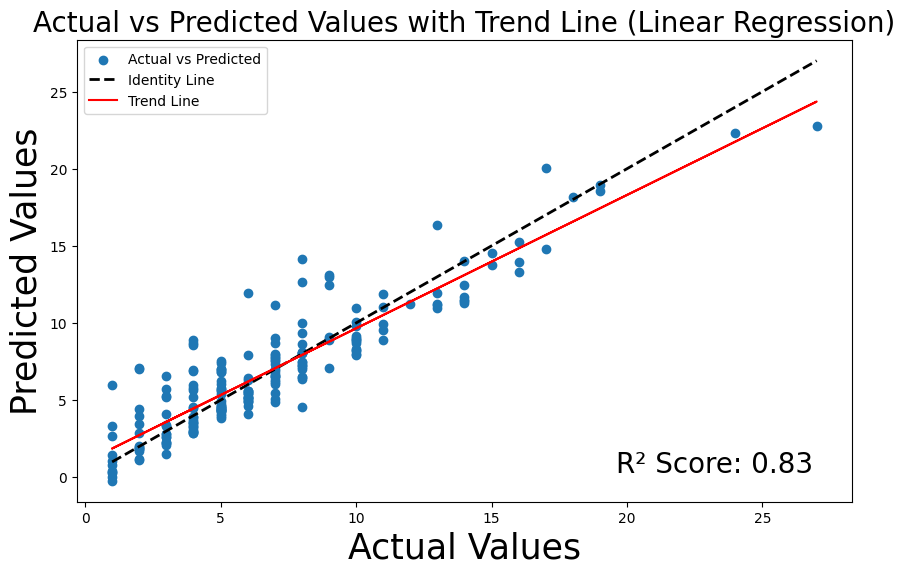

In [20]:
# Assuming Y_test and Y_pred are defined earlier in your code
r2_score_result = r2_score(Y_test, Y_pred)

# Plot the actual vs predicted values with the trend line
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, label='Actual vs Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Identity Line')

# Increase the font size for the title and axis labels
plt.title('Actual vs Predicted Values with Trend Line (Linear Regression)', fontsize=20)
plt.xlabel('Actual Values', fontsize=25)
plt.ylabel('Predicted Values', fontsize=25)

# Add a trend line (line of best fit)
z = np.polyfit(Y_test, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test), color='red', label='Trend Line')

# Add R² score as text on the plot at the bottom right
plt.text(0.95, 0.05, f'R² Score: {r2_score_result:.2f}', 
         transform=plt.gca().transAxes, fontsize=20, 
         verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.show()

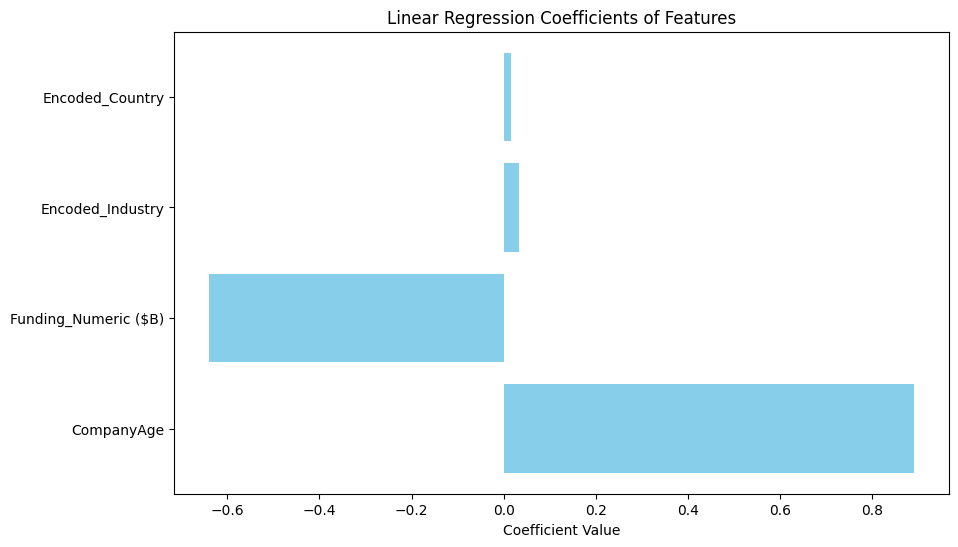

In [21]:
# Extracting coefficients
coefficients = linear_reg.coef_

# Creating a DataFrame for better visualization
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sorting the DataFrame by absolute coefficient values for better visualization
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients of Features')
plt.show()


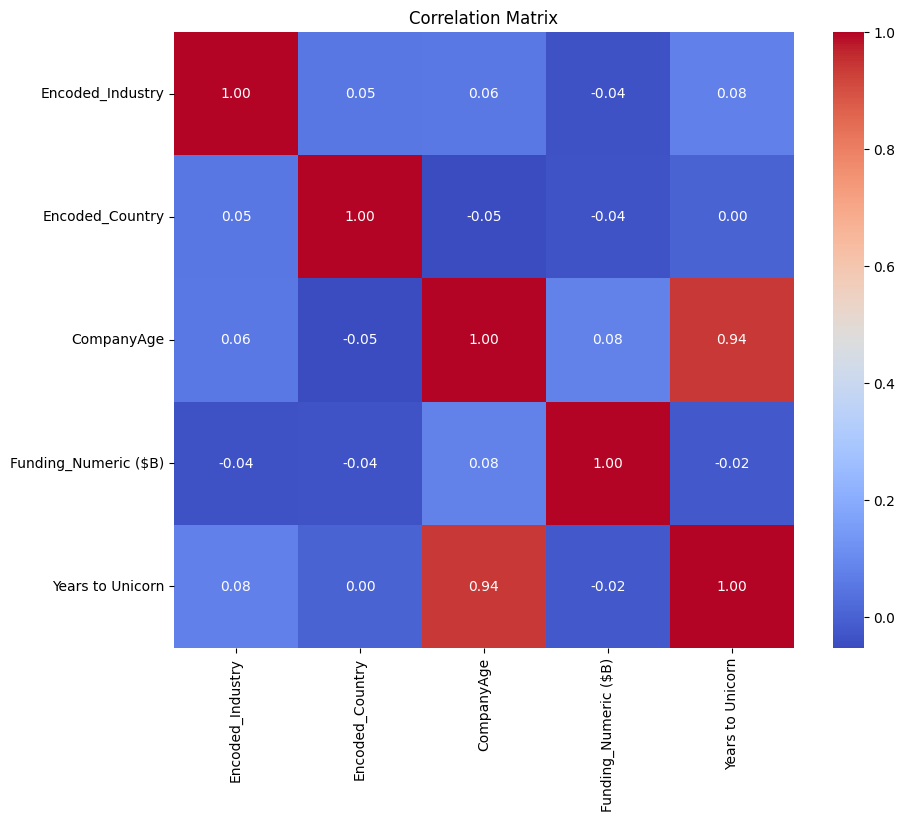

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it already contains the necessary columns
features = ['Encoded_Industry', 'Encoded_Country', 'CompanyAge', 'Funding_Numeric ($B)', 'Years to Unicorn']
correlation_matrix = df[features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig('correlationMatrix.png')
plt.show()

In [23]:
Y.unique()

array([10,  4,  6,  7,  2,  3, 27,  9, 11,  5,  1, 18,  8, 17, 12, 14, 25,
       22, 16, 15, 19, 26, 13, 98, 20, 21, 24, 37, 28])

In [24]:
df['CompanyAge'].unique()

array([ 21,  15,  13,  18,  11,   8,  10,  32,   5,  12,   7,   6,  14,
        20,   9,  25,  22,  16,  17,   4,  27,   3,  24,  19,  29, 104,
        28,  23,   2,  44,  31,  39,  33,  30,  26])

In [25]:
df['Years to Unicorn'].unique()

array([10,  4,  6,  7,  2,  3, 27,  9, 11,  5,  1, 18,  8, 17, 12, 14, 25,
       22, 16, 15, 19, 26, 13, 98, 20, 21, 24, 37, 28])

In [26]:
# pip install statsmodels

In [27]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame and you have 'CompanyAge' as an independent variable
# and 'YearsToUnicorn' as the dependent variable

# Prepare the data
X = df['CompanyAge']  # Independent variable
y = df['Years to Unicorn']  # Dependent variable

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the summary
summary = model.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Years to Unicorn   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     7777.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:58:56   Log-Likelihood:                -2102.8
No. Observations:                1039   AIC:                             4210.
Df Residuals:                    1037   BIC:                             4220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8319      0.115    -15.885      0.000      -2.058      -1.606
CompanyAge     0.8771      0.010     88.186      0.000       0.858       0.897
==============================================================================
Omnibus:                      214.851   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.996
Skew:                          -1.193   Prob(JB):                     1.90e-93
Kurtosis:                       5.042   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

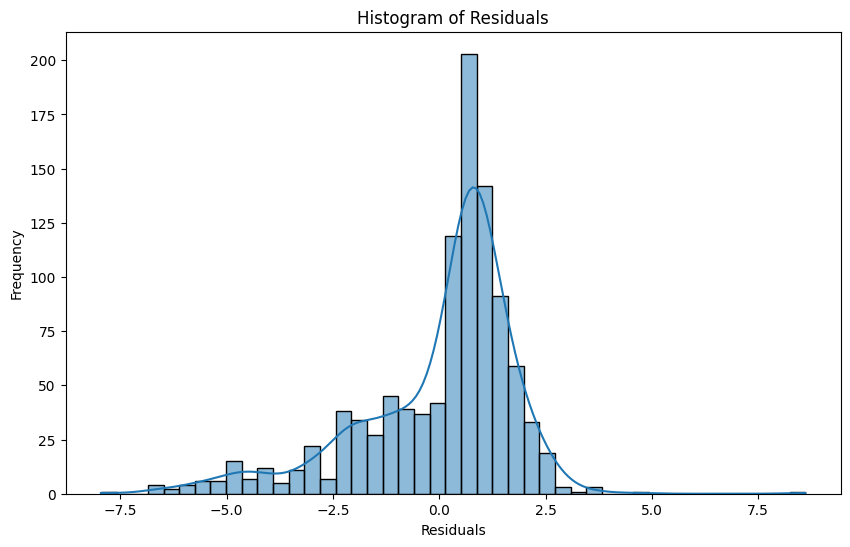

<Figure size 1000x600 with 0 Axes>

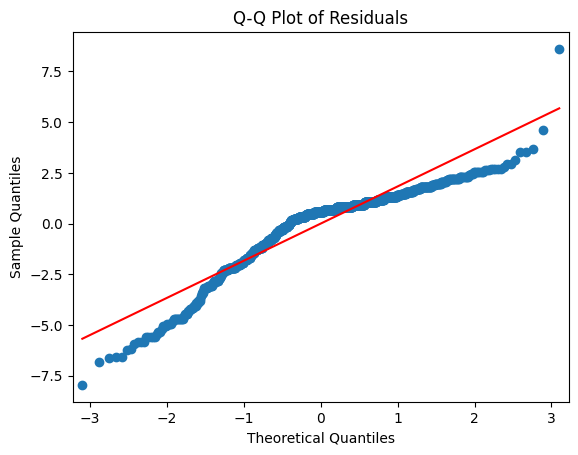

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Fit a linear regression model and obtain slope and intercept
X = df['CompanyAge']
y = df['Years to Unicorn']
X = sm.add_constant(X)  # Add a constant term for intercept
model = sm.OLS(y, X).fit()
slope = model.params['CompanyAge']
intercept = model.params['const']

# Calculate residuals
residuals = df['Years to Unicorn'] - (df['CompanyAge'] * slope + intercept)

# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting the Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')  # 's' denotes standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()


In [30]:
from scipy.stats import pearsonr 

# Step 1: Calculate the means of 'CompanyAge' and 'Years to Unicorn'
mean_company_age = df['CompanyAge'].mean()
mean_years_to_unicorn = df['Years to Unicorn'].mean()

# Step 2: Calculate the deviations from the mean for each variable
company_age_deviations = df['CompanyAge'] - mean_company_age
years_to_unicorn_deviations = df['Years to Unicorn'] - mean_years_to_unicorn

# Step 3: Calculate the numerator
numerator = (company_age_deviations * years_to_unicorn_deviations).sum()

# Step 4: Calculate the denominator
company_age_sq = company_age_deviations**2
years_to_unicorn_sq = years_to_unicorn_deviations**2
denominator = np.sqrt(company_age_sq.sum()) * np.sqrt(years_to_unicorn_sq.sum())

# Step 5: Calculate the Pearson correlation coefficient
pearson_r_manual = numerator / denominator

# Get the Pearson correlation coefficient using the function for comparison
pearson_r_function, _ = pearsonr(df['CompanyAge'], df['Years to Unicorn'])

pearson_r_manual, pearson_r_function

(0.9393306840783119, 0.9393306840783114)

In [31]:
# Calculate the sum of squares of the deviations for CompanyAge
sum_squares_company_age = ((df['CompanyAge'] - mean_company_age)**2).sum()

# Calculate the sum of squares of the deviations for Years to Unicorn
sum_squares_years_to_unicorn = ((df['Years to Unicorn'] - mean_years_to_unicorn)**2).sum()

# Display the calculated sum of squares
sum_squares_company_age, sum_squares_years_to_unicorn

(33960.204042348414, 29611.753609239655)

In [32]:
# Calculate the sum of the product of the deviations for CompanyAge and Years to Unicorn
sum_product_deviations = (company_age_deviations * years_to_unicorn_deviations).sum()

sum_product_deviations

29787.61405197305

In [33]:
# Calculate r using the provided values
r_image = sum_product_deviations / np.sqrt(sum_squares_company_age * sum_squares_years_to_unicorn)
r_image

0.9393306840783118

In [46]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'CompanyAge' and 'Years to Unicorn' columns

# Calculate statistics for 'CompanyAge' and 'Years to Unicorn'
stats_company_age = df['CompanyAge'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'CompanyAge' and 'Years to Unicorn'
iqr_company_age = stats_company_age['75%'] - stats_company_age['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'CompanyAge': stats_company_age,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_company_age, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'CompanyAge' and 'Years to Unicorn'
pearson_corr_company_age, p_value = pearsonr(df['CompanyAge'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for CompanyAge:")
print(stats_df['CompanyAge'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between CompanyAge and Years to Unicorn:", pearson_corr_company_age)
print("p-value:", p_value)


Statistics for CompanyAge:
count    1039.000000
mean       10.086622
std         5.719874
min         2.000000
25%         7.000000
50%         9.000000
75%        12.000000
max       104.000000
IQR         5.000000
Name: CompanyAge, dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between CompanyAge and Years to Unicorn: 0.9393306840783114
p-value: 0.0


In [45]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'Funding_Numeric ($B)' and 'Years to Unicorn' columns

# Calculate statistics for 'Funding_Numeric ($B)' and 'Years to Unicorn'
stats_funding_numeric = df['Funding_Numeric ($B)'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'Funding_Numeric ($B)' and 'Years to Unicorn'
iqr_funding_numeric = stats_funding_numeric['75%'] - stats_funding_numeric['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'Funding_Numeric ($B)': stats_funding_numeric,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_funding_numeric, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'Funding_Numeric ($B)' and 'Years to Unicorn'
pearson_corr2, p_value2 = pearsonr(df['Funding_Numeric ($B)'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for Funding_Numeric ($B):")
print(stats_df['Funding_Numeric ($B)'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between Funding_Numeric ($B) and Years to Unicorn:", pearson_corr2)
print("p-value:", p_value2)


Statistics for Funding_Numeric ($B):
count    1039.000000
mean        0.550465
std         0.784430
min         0.000000
25%         0.222500
50%         0.368000
75%         0.599500
max        14.000000
IQR         0.377000
Name: Funding_Numeric ($B), dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between Funding_Numeric ($B) and Years to Unicorn: -0.021078950419006787
p-value: 0.49732393913145634


In [36]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'Encoded_Industry' and 'Years to Unicorn' columns

# Calculate statistics for 'Encoded_Industry' and 'Years to Unicorn'
stats_encoded_industry = df['Encoded_Industry'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'Encoded_Industry' and 'Years to Unicorn'
iqr_encoded_industry = stats_encoded_industry['75%'] - stats_encoded_industry['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'Encoded_Industry': stats_encoded_industry,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_encoded_industry, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'Encoded_Industry' and 'Years to Unicorn'
pearson_corr3, p_value3 = pearsonr(df['Encoded_Industry'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for Encoded_Industry:")
print(stats_df['Encoded_Industry'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between Encoded_Industry and Years to Unicorn:", pearson_corr3)
print("p-value:", p_value3)


Statistics for Encoded_Industry:
count    1039.000000
mean        7.193455
std         3.644104
min         0.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        14.000000
IQR         5.000000
Name: Encoded_Industry, dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between Encoded_Industry and Years to Unicorn: 0.07770550350686013
p-value: 0.01222797112618683


In [37]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have a DataFrame called 'df' with the 'Encoded_Country' and 'Years to Unicorn' columns

# Calculate statistics for 'Encoded_Country' and 'Years to Unicorn'
stats_encoded_country = df['Encoded_Country'].describe()
stats_years_to_unicorn = df['Years to Unicorn'].describe()

# Recalculate IQR for 'Encoded_Country' and 'Years to Unicorn'
iqr_encoded_country = stats_encoded_country['75%'] - stats_encoded_country['25%']
iqr_years_to_unicorn = stats_years_to_unicorn['75%'] - stats_years_to_unicorn['25%']

# Compile the statistics into a DataFrame for display
stats_df = pd.DataFrame({
    'Encoded_Country': stats_encoded_country,
    'Years to Unicorn': stats_years_to_unicorn
})

# Add IQR to the DataFrame
stats_df.loc['IQR'] = [iqr_encoded_country, iqr_years_to_unicorn]

# Recalculate the Pearson Correlation between 'Encoded_Country' and 'Years to Unicorn'
pearson_corr4, p_value4 = pearsonr(df['Encoded_Country'], df['Years to Unicorn'])

# Display the updated statistics and Pearson correlation result
print("Statistics for Encoded_Country:")
print(stats_df['Encoded_Country'])
print("\nStatistics for Years to Unicorn:")
print(stats_df['Years to Unicorn'])
print("\nPearson Correlation between Encoded_Country and Years to Unicorn:", pearson_corr4)
print("p-value:", p_value4)


Statistics for Encoded_Country:
count    1039.000000
mean       31.200192
std        14.875539
min         0.000000
25%        16.000000
50%        43.000000
75%        43.000000
max        44.000000
IQR        27.000000
Name: Encoded_Country, dtype: float64

Statistics for Years to Unicorn:
count    1039.000000
mean        7.015399
std         5.341133
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
IQR         5.000000
Name: Years to Unicorn, dtype: float64

Pearson Correlation between Encoded_Country and Years to Unicorn: 0.004568818403730642
p-value: 0.8830589261440053


In [47]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Display the p-values for both correlations
print("Pearson Correlation between CompanyAge and Years to Unicorn:", r_image)
print("Pearson Correlation between Funding_Numeric ($B) and Years to Unicorn:", pearson_corr2)
print("Pearson Correlation between Encoded_Industry and Years to Unicorn:", pearson_corr3)
print("Pearson Correlation between Encoded_Country and Years to Unicorn:", pearson_corr4)

# print("P-Value between CompanyAge and Years to Unicorn:", p_value)
# print("P-Value between Funding_Numeric ($B) and Years to Unicorn:", p_value2)
# print("P-Value between Encoded_Industry and Years to Unicorn:", p_value3)
# print("P-Value between Encoded_Country and Years to Unicorn:", p_value4)


Pearson Correlation between CompanyAge and Years to Unicorn: 0.9393306840783118
Pearson Correlation between Funding_Numeric ($B) and Years to Unicorn: -0.021078950419006787
Pearson Correlation between Encoded_Industry and Years to Unicorn: 0.07770550350686013
Pearson Correlation between Encoded_Country and Years to Unicorn: 0.004568818403730642
